In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for statistical plots
%matplotlib inline

In [242]:
bank_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [243]:
bank_df.describe().transpose()

#observations from the below details:
#'Age' majorly clusters between 35 to 55 years.
#'experience' column has min as -3 !! ; we have to take care of this problem.
#'income'have a large range varying between $8000 to $224,000.
#'family' have avg of 2 children.
#'ccavg' have an avg spending of $1,900 per month
#'education' of mejority of peoplr is "graduation".
#'mortgages' has also large variation. we can see few values in 3rd quartile rande only.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [244]:
#we have to eliminate entries showing 'experience' as a negative value and fill with median 
#or median in place of it.

copy=bank_df[bank_df['Experience'] < 0]
copy

# There are 52 entries with -ve yearsof experience.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [245]:
bank_df['Experience']=bank_df['Experience'].abs()

# As there are only 52 -ve 'Experience' entries out of 5000; which is teeny in front of large dataset.
#I converted them to absolute values.

In [246]:
bank_df.describe().transpose()

#now when we look at the 'Experience' column; we see there are no min with -ve number.
#And mean and median are almost equal.

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [247]:
bank_df.nunique()

#By looking at the below data we can observe that 'securities account','CD Account',
#'Online', & 'Credit Card' attributes have either 0 or 1 value.

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [248]:
# After looking at the above details we can understand that Customer ID and ZIP code 
#columns can be easily dropped as of now.These attributes doesnt contribute to 
#further analysis. 
bank_df=bank_df.drop(['ID','ZIP Code'],axis=1)

In [249]:
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [250]:
bank_df.isnull().values.any() #there are no null values 

False

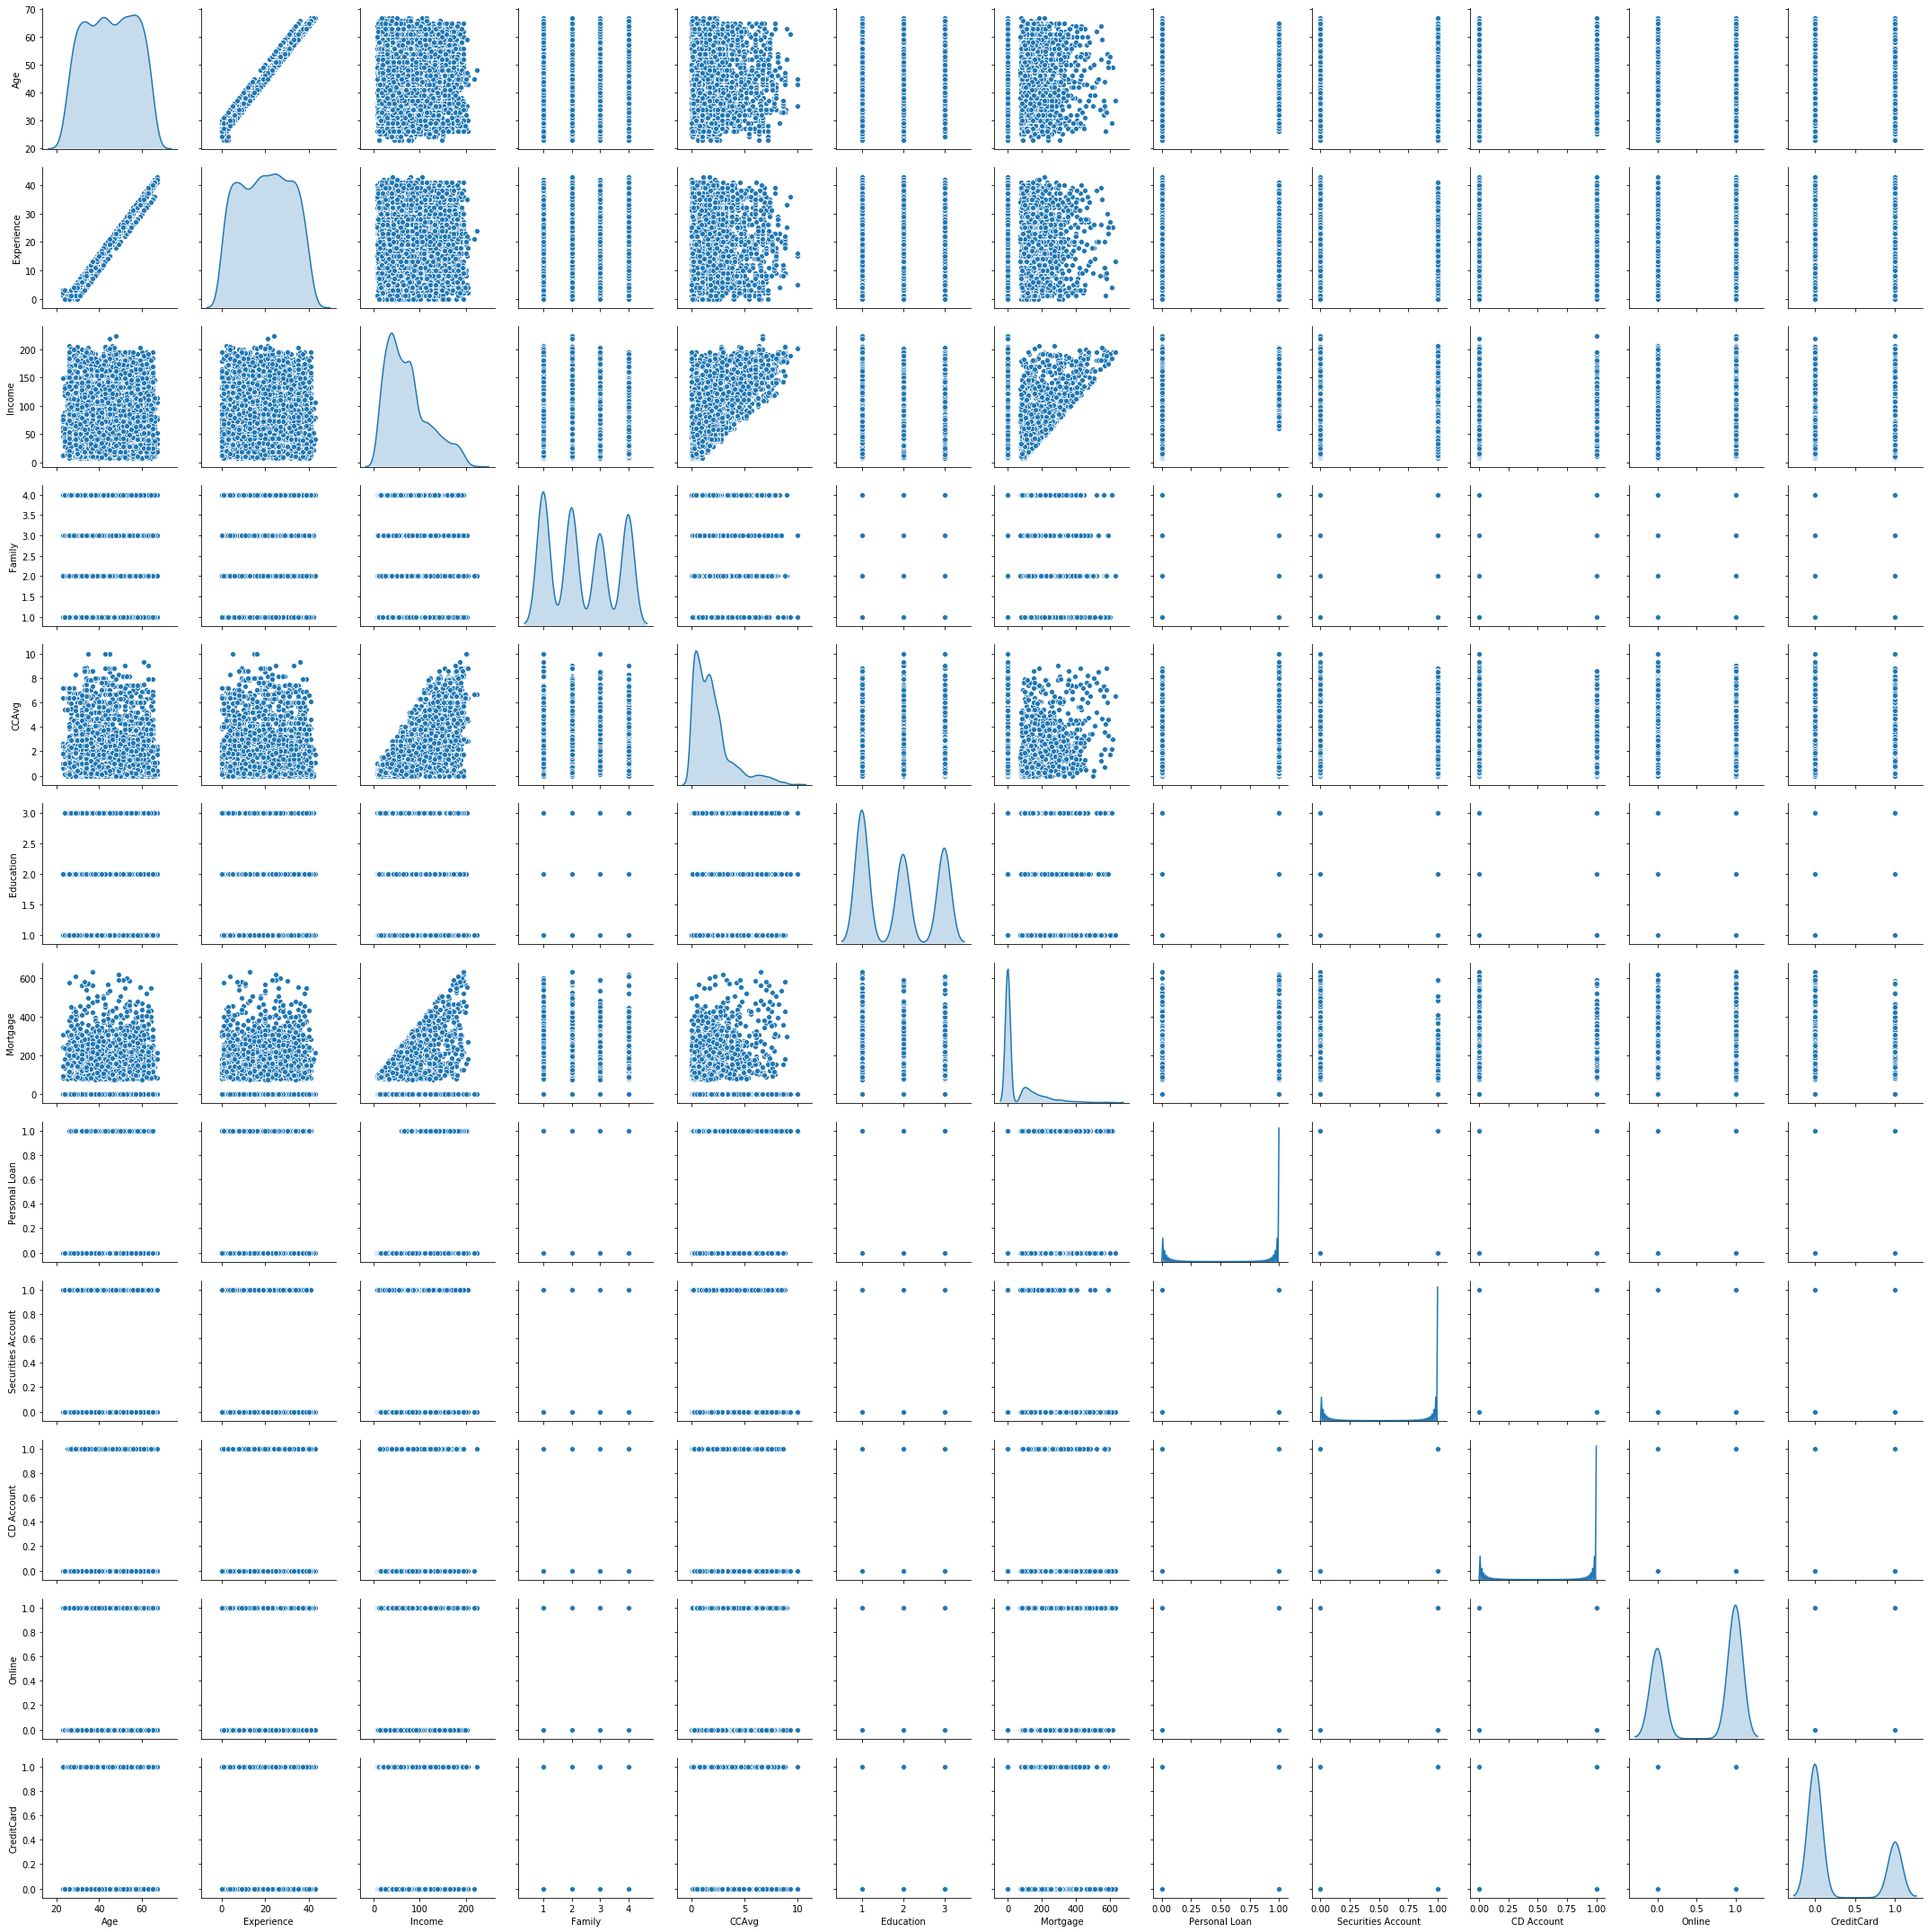

In [196]:
sns.pairplot(bank_df,diag_kind='kde')

In [251]:
corr=bank_df.corr()#this will show correlation matrix
corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [252]:
bank_df.shape

(5000, 12)

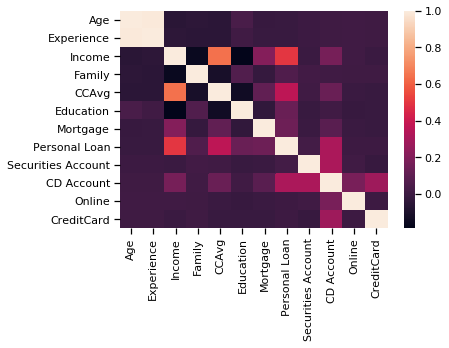

In [253]:
#we want to see correlation in graphical representation so below is the function for that

ax = sns.heatmap(corr, annot=False, fmt='.2f')

#Tere is significant +ve corr between 'income' and 'ccavg'
#'Age' & 'Experience' is largely correlated.
#Tere is significant +ve corr between 'personal loan' and 'income','CCAvg','CDaccount'

'Personal Loan' is our target column.
By looking at the dataset we need to predict wheather the customer will take the persona loan or not.
Now lets observe the above findings indidually.

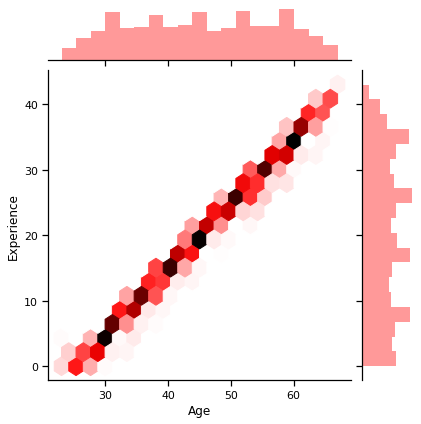

In [271]:
import seaborn as sns #for statistical plots
%matplotlib inline
sns.jointplot(x='Age',y='Experience',data=bank_df,kind="hex",color='red')
#From the below bivariate plot we can clearly see that there is strong +ve corr between Age and Experience.

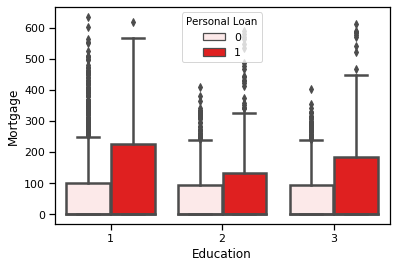

In [277]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank_df,color='red')
#people who have taken personal loan have high mortgage than who dont have personal loan.

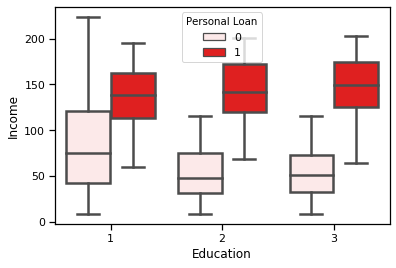

In [275]:
sns.boxplot(x="Education", y='Income', hue="Personal Loan", data=bank_df,color='red')
# people with income more than $100,000 have only taken Personal Loan.

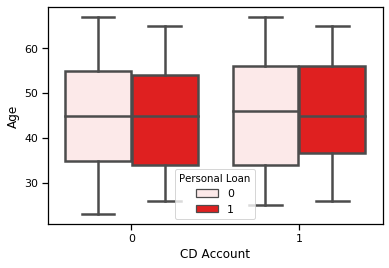

In [281]:
sns.boxplot(x="CD Account", y='Age', hue="Personal Loan", data=bank_df,color='red')
# We can see that max people who have taken loan are in the age group of 35-55 years.
# And all the people who have taken the loan have CD Account.

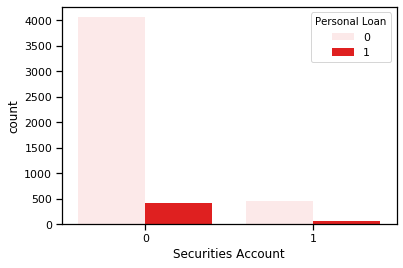

In [284]:
sns.countplot(x="Securities Account", data=bank_df,hue="Personal Loan", color='red')
#From the below plot we can infer taht most people who have not taken the loan have securities account.

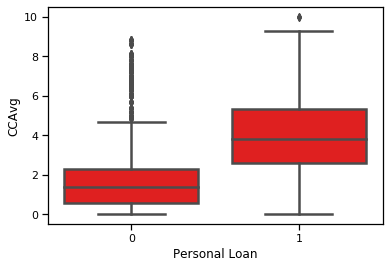

In [286]:
sns.boxplot(x="Personal Loan", y="CCAvg",data=bank_df,color='red')
#From the below plot we can infer that people who have taken personal loan have higher credit card spending per month.

Lets apply Models now and see the predictions for personal Loan.
# Logistic Regression

In [291]:
# Define X & Y variables
X=bank_df.drop('Personal Loan',axis=1)
Y=bank_df[['Personal Loan']]
# Split dataset into Training & Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [292]:
from sklearn.linear_model import LogisticRegression

In [293]:
# Build the Logistic Regression Model
logisticRegr=LogisticRegression()

In [294]:
logisticRegr.fit(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [296]:
# use score method to get Accuracy of model or predict on test
score=logisticRegr.score(X_test,y_test)
print(score)

0.9473333333333334


Accuracy of logistic regression classifier on test set is 94.733%

In [299]:
# Lets predict for train Set
pred_train=logisticRegr.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix

mat_train=confusion_matrix(y_train,pred_train)

print("confusion matrix=\n",mat_train)

confusion matrix=
 [[3127   37]
 [ 129  207]]


In [301]:
accuracy=(3125+207)/(3125+37+129+207)
print(accuracy)

0.952544311034877


In [302]:
# lets predict for test set
pred_test=logisticRegr.predict(X_test)

mat_test=confusion_matrix(y_test,pred_test)

print('confusion matrix=\n',mat_test)

confusion matrix=
 [[1332   24]
 [  55   89]]


In [303]:
precision=(1332+89)/(1332+24+55+89)
print(precision)

0.9473333333333334


predicted accuracy of logistic regression classifier on test set is 94.733%.

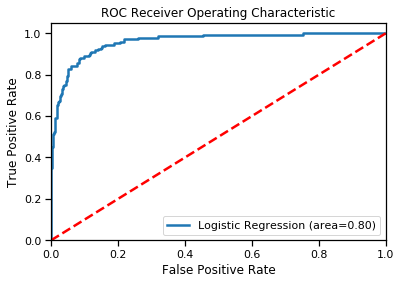

In [308]:
#AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test,logisticRegr.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logisticRegr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Receiver Operating Characteristic')
plt.savefig('Log_ROC')
plt.legend(loc='lower right')
plt.show()

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away 
from that line as possible (toward the top-left corner)

# KNN Model

To select best K value ;we need to run the KNN test for multiple K numbers. The K with best accuracy score is 
taken as optimal.

Lets run the KNN with number of neighbours to be 1,3,5,...15.  
Miscalculation error(MSE)=1-Test accuracy score.  
Here we find optimal K value using MSE for each iteration of K.


In [312]:
#creating odd list of K for KNN
neighbour=np.arange(1,16,2)
neighbour

array([ 1,  3,  5,  7,  9, 11, 13, 15])

In [332]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Empty list that will hold accuracy scores
sc_scores=[]
#performing accuracy metrics for all K values i.e 1,3,,7,..15
for k in neighbour:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    #predicting the response
    y_pred=knn.predict(X_test)
    #evaluating accuracy
    scores=accuracy_score(y_test,y_pred)
    sc_scores.append(scores)
print("accuracy for k= 1,3,5,7,9,11,13,15 is")
print(sc_scores)
#changing the misclassification error
MSE=[1- x for x in sc_scores]
#finding the optimal K
optimal_k=neighbour[MSE.index(min(MSE))]
print("best K value is %d"%optimal_k)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel

accuracy for k= 1,3,5,7,9,11,13,15 is
[0.9193333333333333, 0.9146666666666666, 0.9186666666666666, 0.91, 0.9126666666666666, 0.91, 0.9106666666666666, 0.91]
best K value is 1


Looking at the above data we can see that accuracy is highest for k=1 and that is 91.93%.

In [333]:
# to calculate confusion matrics calculating KNN for k=1 ony\ly
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9193333333333333


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [336]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[1302   54]
 [  67   77]]


In [337]:
precision=(1302+77)/(1302+54+67+77)
print(precision)

0.9193333333333333


from the above two calculations we can conclude that KNN for k=1 gives accuracy of 91.933% and when cross checked with confusion matrics also gives the exact same accuracy.

# Naive Bayes

In [340]:
from sklearn.naive_bayes import GaussianNB
loan_model=GaussianNB()
loan_model.fit(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [349]:
#measuring performance with training set
loan_train_pred=loan_model.predict(X_train)
print("model accuracy:{0:.4f}".format(metrics.accuracy_score(y_train,loan_train_pred)))

model accuracy:0.8823


In [351]:
#measuring performance with testing set
loan_test_pred=loan_model.predict(X_test)
print("model accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,loan_test_pred)))

model accuracy:0.8780


In [352]:
cm=metrics.confusion_matrix(y_test,loan_test_pred)
print(cm)

[[1233  123]
 [  60   84]]


In [353]:
precision=(1233+84)/(1233+123+60+84)
print(precision)

0.878


Accuracy for Naive Bayes model is 87.80% and also when we cross check we get same value.

# comparison of models

Accuracy of different models is as under :   
Logistic Regression model = 94.73%  
KNN model = 91.93%   
Naive Bayes model = 87.80%   
Conclusion: Logistic Regression model gives better accuracy out of the above three models.   